## 1. Image Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Feature\ Engineering/Project

/content/drive/MyDrive/Feature Engineering/Project


## **Importing all the extracted Features**

In [6]:
import extraction

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from glob import glob

from tqdm import tqdm
import skimage
from skimage.transform import resize
from sklearn.utils import shuffle
from skimage.color import rgb2gray

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = []
y = []

In [ ]:
image_data_location= "/content/drive/My Drive/Forest Fire Detection/Forest Fire Dataset"

for fire_image_folder in os.listdir(image_data_location):
            if fire_image_folder in ["fire"]: 
                fire_label = 1
            elif fire_image_folder in ["start_fire"]:
                fire_label = 2
            else:
                fire_label = 0
            for image in tqdm(os.listdir(image_data_location +"/" +fire_image_folder+"/")):
                imgage_file = cv2.imread(image_data_location + "/" +fire_image_folder + "/" + image)
                if imgage_file is not None:
                    #imgage_file = rgb2gray(skimage.transform.resize(imgage_file,(224,224,3), anti_aliasing=True))
                    imgage_file = skimage.transform.resize(imgage_file,(224,224,3), anti_aliasing=True)
                    imgage_array = np.asarray(imgage_file)
                    X.append(imgage_array)
                    y.append(fire_label)


100%|██████████| 760/760 [00:23<00:00, 32.99it/s]


In [ ]:
y = np.array(y)

In [ ]:
no_fire_count = (y == 0).sum()
fire_count = np.count_nonzero(y == 1)
start_fire_count = np.count_nonzero(y == 2)

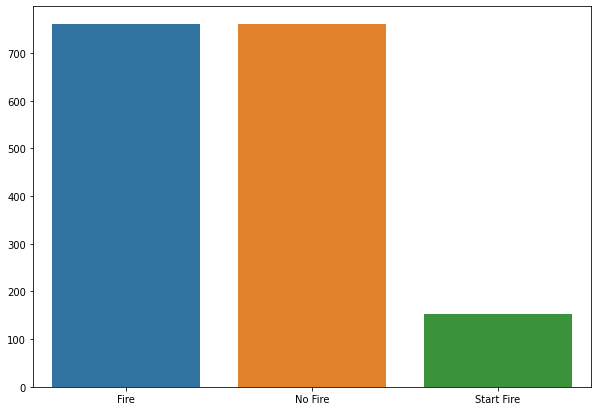

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(x = ['Fire', 'No Fire', 'Start Fire'], y = [fire_count, no_fire_count, start_fire_count])

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
X, y = shuffle(X, y)

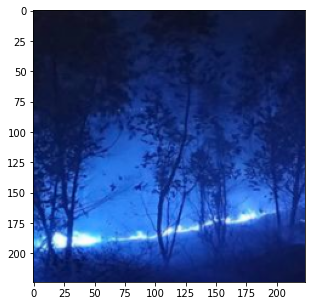

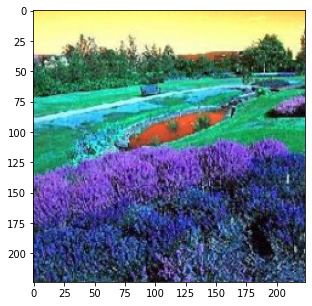

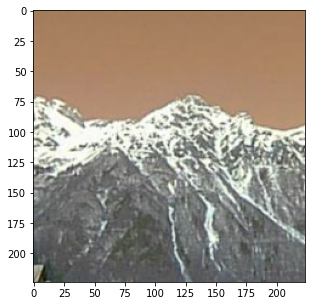

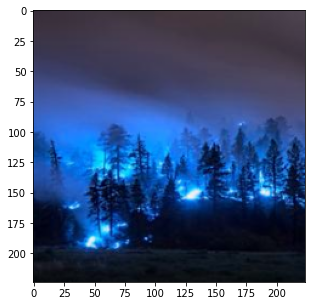

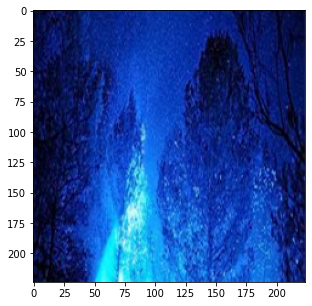

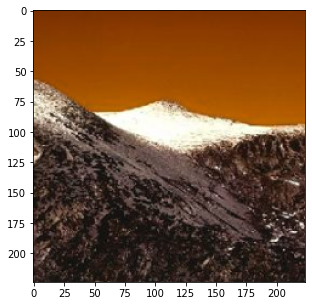

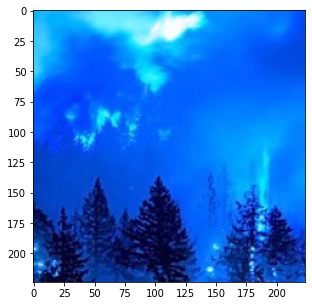

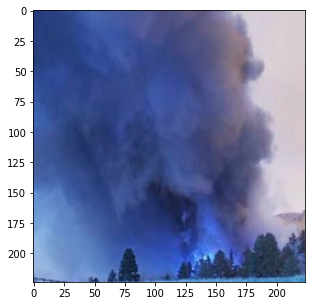

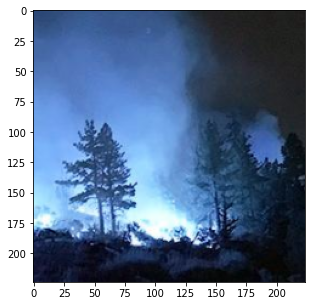

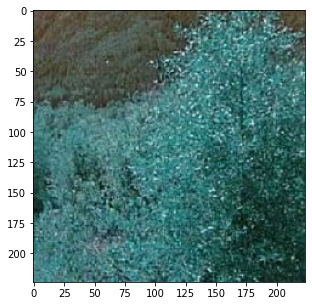

In [ ]:
for i in X [:10]:
  plt.figure(figsize = (5,5))
  plt.imshow(i)

In [ ]:
y[:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

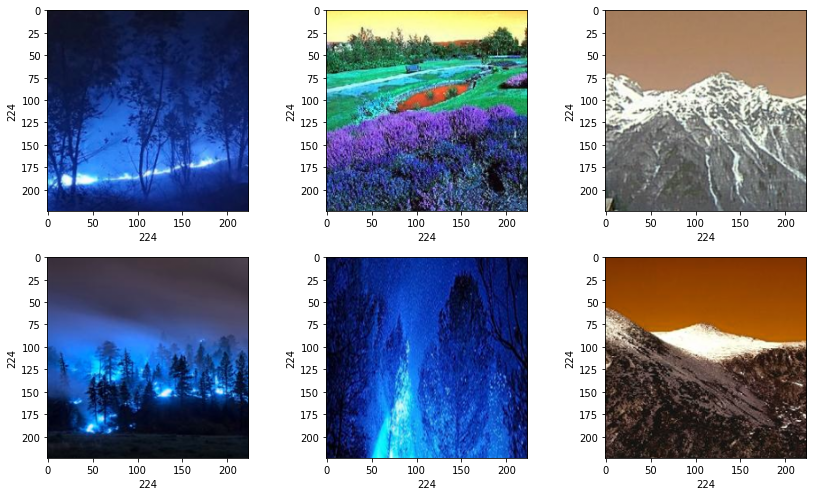

In [ ]:
plt.figure(figsize=(12,10))

for i in range(1,7):
  plt.subplot(3,3,i)
  plt.tight_layout()
  plt.imshow(X[i-1])
  plt.xlabel(X[i-1].shape[1], fontsize=10)
  plt.ylabel(X[i-1].shape[0], fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


Text(0.5, 1.0, 'histogram representation of gray values')

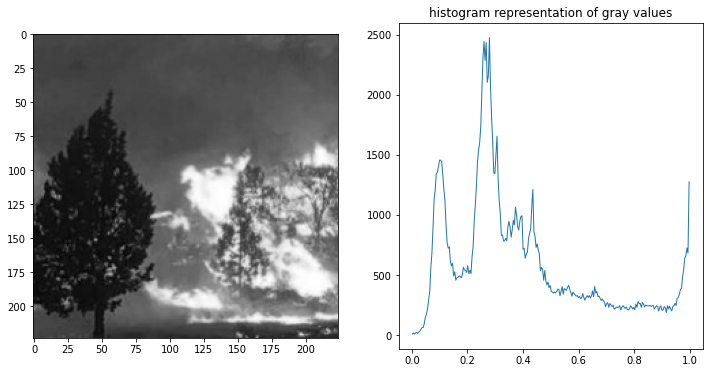

In [ ]:
from skimage.exposure import histogram
histogram, histogram_centers = histogram(X[10])
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rgb2gray(X[10]), cmap=plt.cm.gray)
axes[1].plot(histogram_centers, histogram, lw=1)
axes[1].set_title('histogram representation of gray values')

## 2. Model Training

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.79.150.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.79.150.34:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Device: grpc://10.79.150.34:8470
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
IMG_SIZE = 224
NUM_CLASSES = 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

In [ ]:
encoder.fit(y)

LabelBinarizer()

In [ ]:
y = encoder.transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, shuffle = True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

In [ ]:
# Training using Transfer learning on Inception V3 model

In [ ]:
from keras import Model
import tensorflow
from tensorflow.keras.applications  import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def build_inception_based_model(num_classes):
    # weights are pre-trained with imagenet
    base_model = InceptionV3(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

    x = base_model.output
    x = Dense(2048, activation='relu', name='fc_1')(x)
    x = Dense(1024, activation='relu', name='fc_2')(x)
    predictions = Dense(num_classes, activation='softmax', name='fc_class')(x)  # dense layer with neurons with softmax
    model = Model(inputs=base_model.inputs, outputs=predictions)  # input is based model input, output is custom

    # by default only the fc layers are trainable (layers in base_model are not trainable)
    for layer in base_model.layers:
        layer.trainable = False
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
with strategy.scope():
    model = build_inception_based_model(num_classes=NUM_CLASSES)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

### Early Stopping and Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [ ]:
epochs = 50
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks = [early_stop])

Epoch 1/50
26/26 [==============================] - 54s 1s/step - loss: 131.8954 - accuracy: 0.6215 - val_loss: 0.3653 - val_accuracy: 0.8636
Epoch 2/50
26/26 [==============================] - 2s 85ms/step - loss: 0.3327 - accuracy: 0.8864 - val_loss: 0.2082 - val_accuracy: 0.9290
Epoch 3/50
26/26 [==============================] - 2s 86ms/step - loss: 0.2914 - accuracy: 0.8999 - val_loss: 0.3254 - val_accuracy: 0.8977
Epoch 4/50
26/26 [==============================] - 2s 84ms/step - loss: 0.2857 - accuracy: 0.8950 - val_loss: 0.2812 - val_accuracy: 0.9176
Epoch 5/50
26/26 [==============================] - 2s 86ms/step - loss: 0.1227 - accuracy: 0.9524 - val_loss: 0.1864 - val_accuracy: 0.9347
Epoch 6/50
26/26 [==============================] - 2s 85ms/step - loss: 0.0574 - accuracy: 0.9878 - val_loss: 0.2070 - val_accuracy: 0.9432
Epoch 7/50
26/26 [==============================] - 2s 87ms/step - loss: 0.0246 - accuracy: 0.9963 - val_loss: 0.1526 - val_accuracy: 0.9545
Epoch 8/50
2

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,131.895355,0.621490,0.365314,0.863636
1,0.332653,0.886447,0.208179,0.928977
2,0.291449,0.899878,0.325376,0.897727
3,0.285681,0.894994,0.281250,0.917614
4,0.122651,0.952381,0.186435,0.934659


In [ ]:
losses = losses.drop(0)

In [ ]:
losses.rename(columns = {'loss':'training_loss', 'accuracy':'training_accuracy'}, inplace = True)

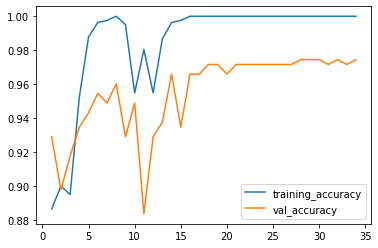

In [ ]:
losses[['training_accuracy', 'val_accuracy']].plot()

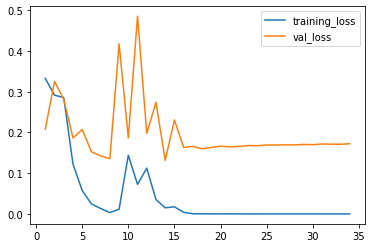

In [ ]:
losses[['training_loss', 'val_loss']].plot()

In [ ]:
pred = model.predict(X_test)

In [ ]:
def preds(pred):
  pred = list(pred)
  max_pred = max(pred)
  for i in range(0,len(pred)):
    if pred[i] == max_pred:
      pred[i] = 1
    else:
      pred[i] = 0
  return pred

In [ ]:
y_pred = []
for i in range(0, len(pred)):
  y_pred.append(preds(pred[i]))

In [ ]:
y_pred = encoder.inverse_transform(pred, threshold = 0)

In [ ]:
y_test = encoder.inverse_transform(y_test, threshold = 0)

### 1. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9641434262948207

### 2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('\tF\tNF\tSF')
print('F\t'+str(cm[0][0])+'\t' + str(cm[0][1]) + '\t' + str(cm[0][2]))
print('NF\t'+str(cm[1][0])+'\t' + str(cm[1][1]) + '\t' + str(cm[1][2]))
print('SF\t'+str(cm[2][0])+'\t' + str(cm[2][1]) + '\t' + str(cm[2][2]))

	F	NF	SF
F	222	5	1
NF	4	223	1
SF	4	3	39


### 3. Precision - Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average = 'macro')

(0.9606016229558118, 0.9331934909738114, 0.9458871994870885, None)

In [ ]:
len(y_test)

502

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision_recall_curve()
# For each class
n_classes = 3
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[: i], y_pred[: i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_pred, average="micro")

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

In [ ]:
model_json = model.to_json()
with open("Forestmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Forestmodel.h5")
print("Saved model to disk")